# Biodiversity in National Parks

## Project Overview

A data analysis on the conservation of endangered National Park species to try to identify patterns or themes in how these species become endangered.

#### **Project Goals:**

* **Conduct an exploratory data analysis:**
    * Establish the question we are trying to solve
    * What kind of data do we have? What types of visualizations suit our types?
    * What's missing from the data? (if anything)
    * Where are the outliers?
    * How can we add, change or remove features to get more out of the data?


* **Questions to gain insight**
    * What is the distribution of conservation_status for animals?
    * Are certain types of species more likely to be endangered?
    * Are the differences between species and their conservation status significant?
    * Which species were spotted the most at each park?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. Note: The data for this project is *inspired* by real data, but is mostly fictional. Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).


### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

In [1]:
# import packages

# Manipulation
import numpy as np
import pandas as pd

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
import missingno
sns.set_theme(style="white")

# Statistics
from scipy.stats import chi2_contingency

### Exploratory Data Analysis

Steps:
   1. Import the Data
   2. Get a feel for the data, use info(), head(), and tail() functions
   3. Take a deeper look into the data by querying/indexing the data
   4. Identify features of interest
   5. Recognize the challeges posed by the data such as missing values or outliers
   6. Discover patterns in the data (through visualization)

In [2]:
# 1 Import the data

species_info = pd.read_csv('species_info.csv')
# species_info contains data about different species and their conservation status

observations = pd.read_csv('observations.csv')
# observations holds recorded sightings of different species at several national parks for the past 7 days.

In [35]:
# 2 Get a feel for the data, describe the data, look at the first/last rows, shape: species_info data set
species_info.head(6)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False


In [4]:
species_info.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Canis lupus,Dicranum Moss,Species of Concern
freq,4470,3,7,161


In [5]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [6]:
# using value counts to see how many unique values we have of each observation in the category variable
species_info.category.value_counts().reset_index()

,index,category
0,Vascular Plant,4470
1,Bird,521
2,Nonvascular Plant,333
3,Mammal,214
4,Fish,127
5,Amphibian,80
6,Reptile,79


In [7]:
# using value counts to see how many unique values we have of each observation in the conservation status variable column
species_info.conservation_status.value_counts().reset_index()

,index,conservation_status
0,Species of Concern,161
1,Endangered,16
2,Threatened,10
3,In Recovery,4


In [8]:
print(f"na values:{species_info.conservation_status.isna().sum()}")

na values:5633


**Data types:**

The info and value_counts functions allowed us to determine the following:
   * The category, scientific_names, common_names, and conservation_status are nominal categorical variables
   * The are 4 different conservation statues: Species of Concern, Endangered, Threatened, In Recovery
   * There are 7 different categories of species, Vascular Plant, Bird, Nonvascular Plant, Mammal, Fish, Amphibian, Reptile
   * There are 191 nonnull values and 5633 null values in conservation status.

In [9]:
# 2 Get a feel for the data, describe the data, look at the first/last rows, shape: observations data set
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [10]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [11]:
# 3 Take a deeper look into the data by querying/indexing the data

In [12]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [13]:
observations.park_name.value_counts().reset_index()

,index,park_name
0,Yosemite National Park,5824
1,Great Smoky Mountains National Park,5824
2,Yellowstone National Park,5824
3,Bryce National Park,5824


In [14]:
observations.scientific_name.value_counts().reset_index()

,index,scientific_name
0,Hypochaeris radicata,12
1,Holcus lanatus,12
2,Castor canadensis,12
3,Puma concolor,12
4,Myotis lucifugus,12
...,...,...
5536,Erysimum inconspicuum,4
5537,Viburnum nudum var. cassinoides,4
5538,Carex parryana var. parryana,4
5539,Dicentra canadensis,4


### **Data Types:**

The info and value_counts functions allowed us to determine the following:
   * scientific_name and park_name are nominal categorical varibles
   * obeservations is a discrete quantitative variable
   * There are an equal number of observations (5824) between each park name
   * There were 5541 different species observed
   * Some species were observed up to 12 times, whereas others were only observed 4 times
   * There are no null values

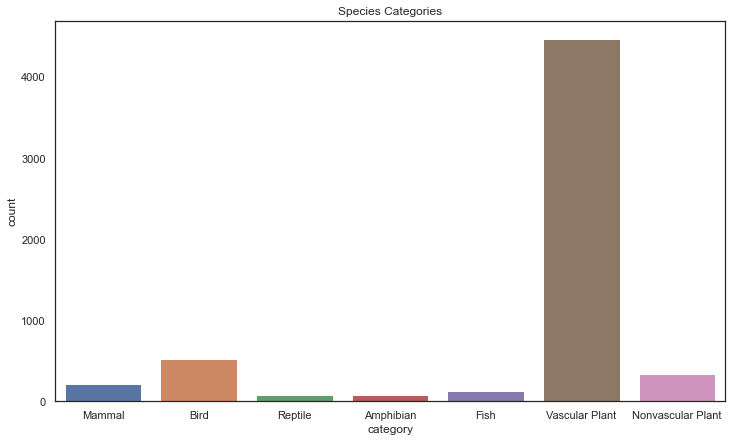

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(data=species_info, x='category')
plt.title('Species Categories')
plt.show()

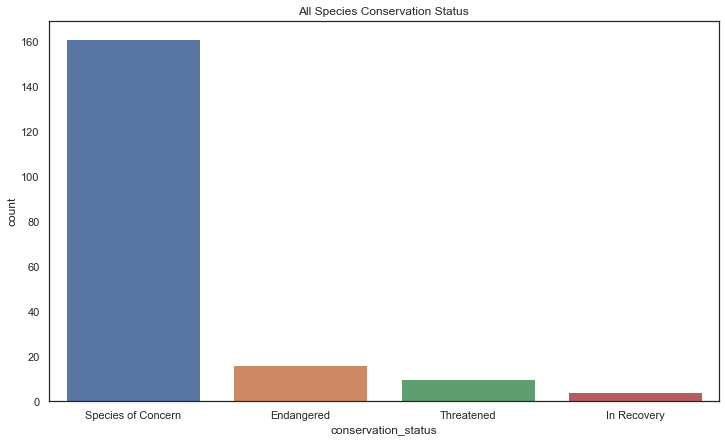

In [16]:
plt.figure(figsize=(12,7))
sns.countplot(data=species_info, x='conservation_status')
plt.title('All Species Conservation Status')
plt.show()

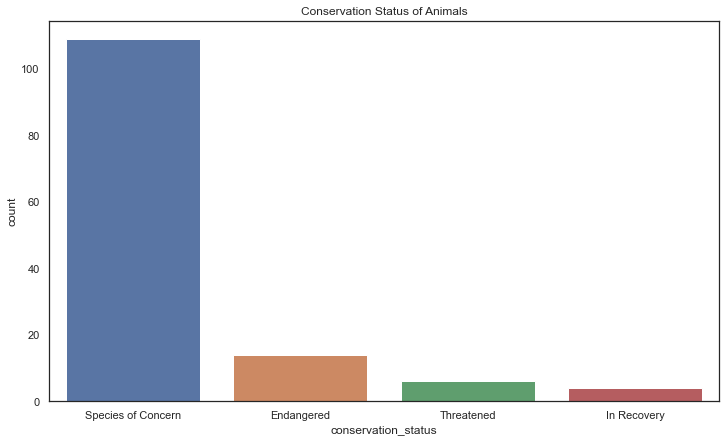

In [17]:
# querying conservation status for animals only
animal = species_info[(species_info.category =='Mammal') 
                      | (species_info.category =='Bird') 
                      | (species_info.category =='Reptile') 
                      | (species_info.category =='Amphibian category') 
                      | (species_info.category =='Fish')]

# creating distribution of conserrvation status for animals
plt.figure(figsize=(12,7))
sns.countplot(data=animal, x='conservation_status')
plt.title('Conservation Status of Animals')
plt.show()

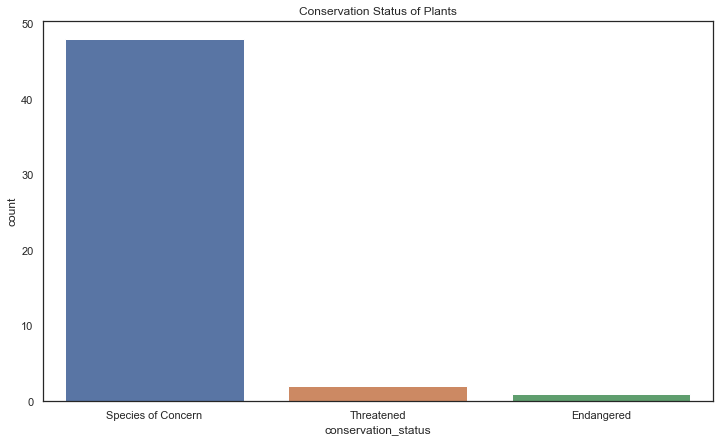

In [18]:
# querying conservation status for plants only
plant = species_info[(species_info.category =='Vascular Plant') 
                      | (species_info.category =='Nonvascular Plant')]

# creating distribution of conserrvation status for animals
plt.figure(figsize=(12,7))
sns.countplot(data=plant, x='conservation_status')
plt.title('Conservation Status of Plants')
plt.show()

 Identify features of interest

   * In this dataset, the features of interest are endangered and categories of species
   * We will conduct an analysis by utilizing 'animal' and 'plant' bins
   * One question we may want to ask is: does plant species endangerment/extinction coorelate with animal species endangerment/extinction?
   
   

# Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the conservation_status column in species.

The column conservation_status has several possible values:

* Species of Concern: declining or appear to be in need of conservation
* Threatened: vulnerable to endangerment in the near future
* Endangered: seriously at risk of extinction
* In Recovery: formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of nan values were detected. These values will need to be converted to No Intervention.

<AxesSubplot:>

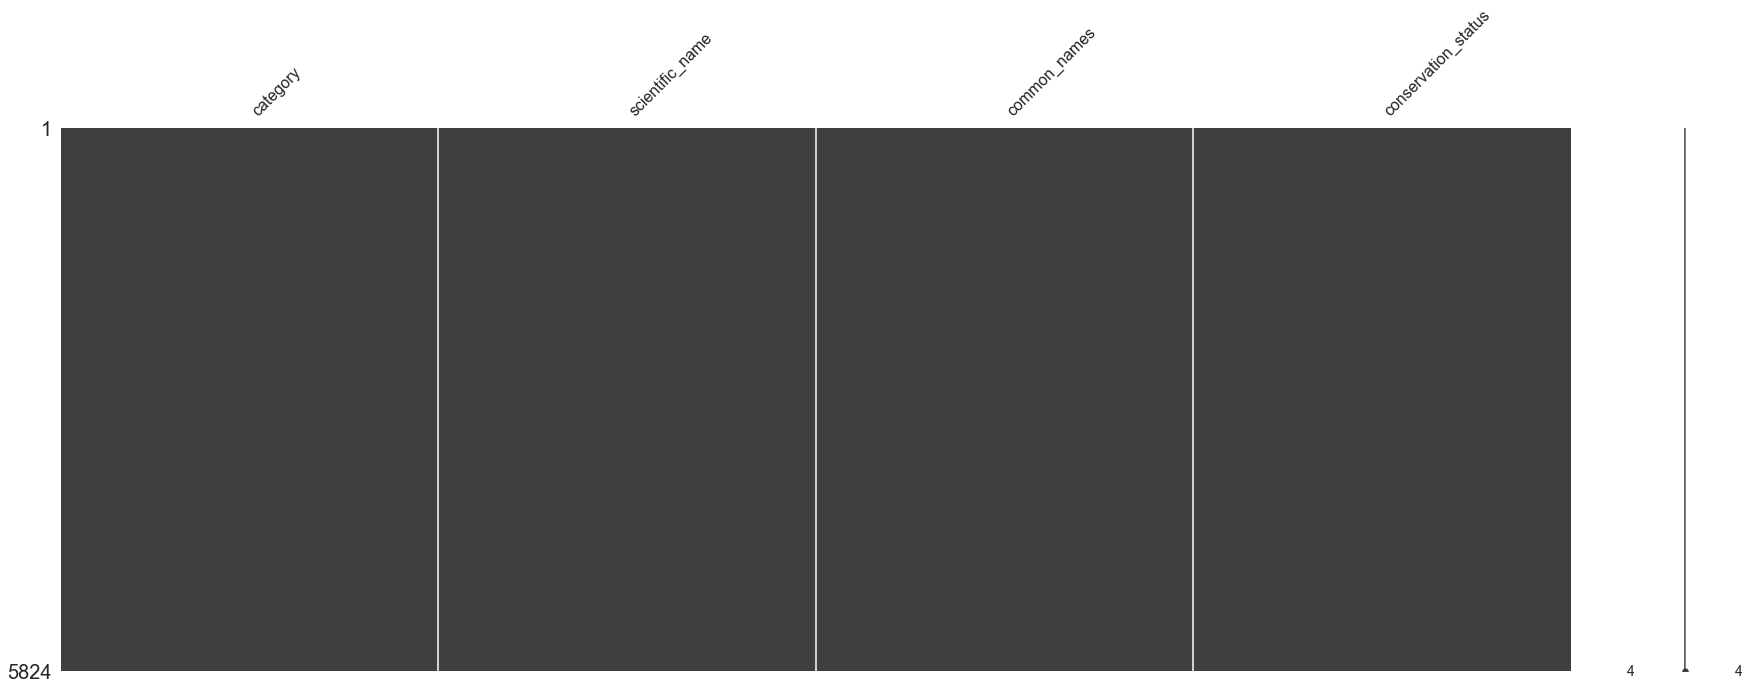

In [19]:
# first thing we will do in replace all the null values in the species_info df with 'No Intervention'
species_info.fillna('No Intervention', inplace=True)
missingno.matrix(species_info, figsize = (30,10))

Next is to checkout the different categories that are nested in the conservation_status column except for the ones that do not require an intervention. There is both the table and chart to explore below.

For those in the Endangered status, 7 were mammals and 4 were birds. In the In Recovery status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals.

In [20]:
conservationCategory = species_info[species_info.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


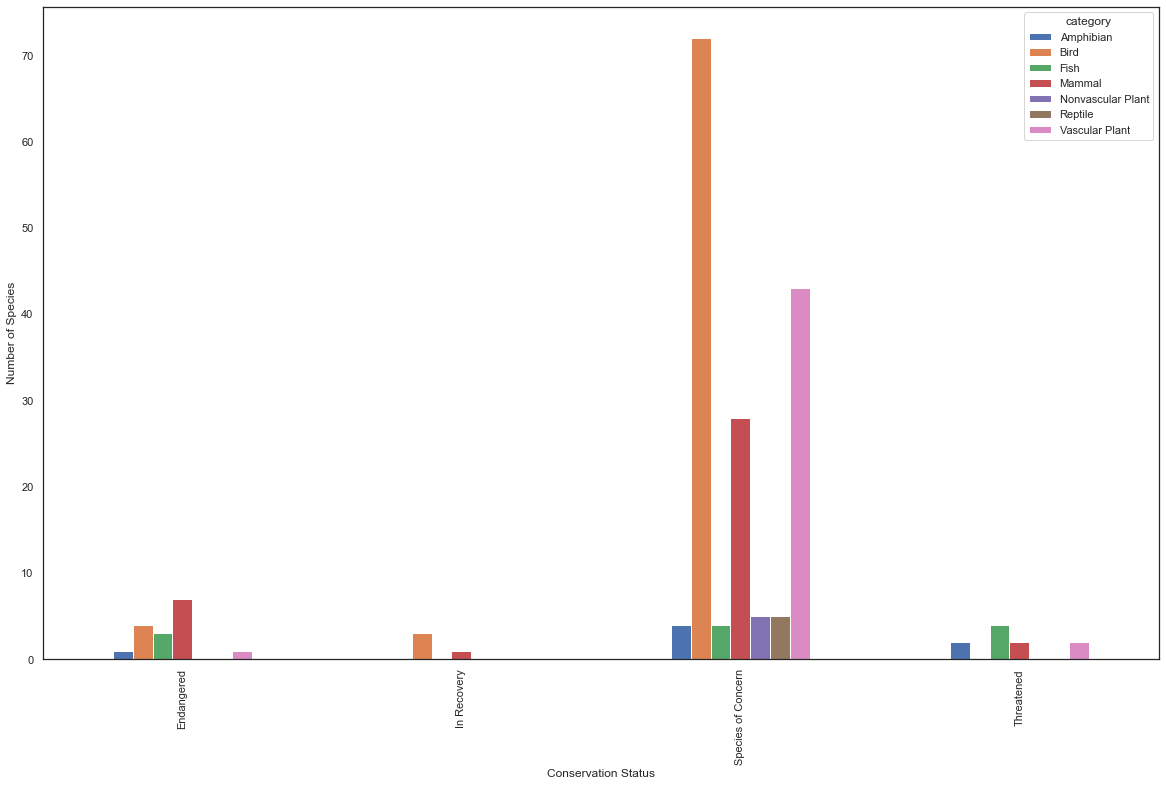

In [21]:
ax = conservationCategory.plot(kind = 'bar', figsize=(20,12), 
                               )
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

### In conservation

The next question is if certain types of species are likely to be endangered. This can be answered by creating a new column called 'is_protected' and include any species that had a calue other than 'No Intervention'

In [22]:
# creating is_protected column
species_info['is_protected'] = species_info.conservation_status != 'No Intervention'

# grouping by category and is_protected to show species and protection status
category_counts = species_info.groupby(['category', 'is_protected'])\
                                .scientific_name.nunique()\
                                .reset_index()\
                                .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                                .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']



# calculating proportion of protected
category_counts['percent_protected'] = category_counts.protected / \
                                    (category_counts.protected + category_counts.not_protected)


# # # sorting
category_counts = category_counts.sort_values(by='percent_protected', ascending=False)

# # converting 'percent_endangered' from float to percentage
category_counts.style.format({'percent_protected': '{:,.2%}'.format})

,category,not_protected,protected,percent_protected
3,Mammal,146,30,17.05%
1,Bird,413,75,15.37%
0,Amphibian,72,7,8.86%
2,Fish,115,11,8.73%
5,Reptile,73,5,6.41%
4,Nonvascular Plant,328,5,1.50%
6,Vascular Plant,4216,46,1.08%


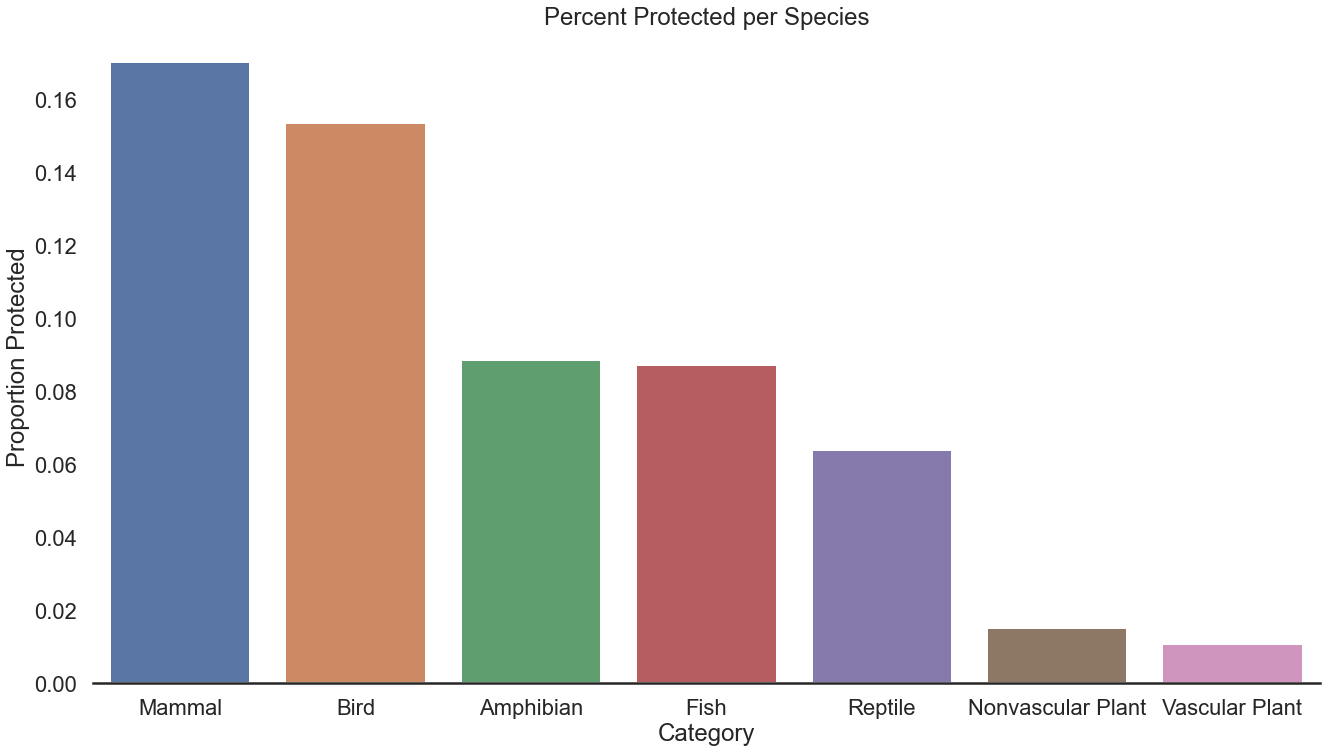

In [28]:
plt.figure(figsize=(22,12))
ax = sns.barplot(y="percent_protected", x='category',data=category_counts)
ax.set_title('Percent Protected per Species')
ax.set(xlabel="Category", ylabel="Proportion Protected")
sns.despine(left=True)
sns.set_context("poster")
plt.show()

## Determining Statistical Significance

I will be using a standard p-value of 0.05 to test statistical significance.

**Null Hypothesis:**
   * There is a no difference in conservation status rates between mammals and other species.
    
**Alternative Hypothesis**
   * There is a difference in conservation status rates between mammals and other species.

In order to determine whether different species have statistically significant differences in conservation status rates, I will run a few chi-squared tests. 

In order to run a chi-squared test, I will create contingency tables utilizing the 'protected' and 'not_protected' values from the category_counts dataframe.

In [24]:
mammal_bird_contingency = [[30, 146], [75, 413]]
mean, pval, skew, kurt = chi2_contingency(mammal_bird_contingency)
print(pval)

0.6875948096661336


The p-value retrieved from running the chi-squared test resulted in .687 which is above the significance threshold of 0.05. We can conclude that there is no significant difference in the the conservation status rates between Mammals and Birds.

In [25]:
mammal_reptile_contingency = [[30, 146], [5, 73]]
mean, pval, skew, kurt = chi2_contingency(mammal_reptile_contingency)
print(pval)

0.03835559022969898


The p-value retrieved from running the chi-squared test resulted in .038 which is below the significance threshold of 0.05. We can conclude that there is a significant difference in the conservation status rates between Mammals and Reptiles. This thereby allows us to reject the Null Hypothesis and conclude that there is a difference in conservation status rates between mammals and other species.

## Finding the Most Common Species

The next set on the analysis will be based on the data from the conservationists who have been recording their sightings of different species at several national parks for the last 7 days.

The first step is to look as the common names from species to get an idea of the most prevalent animals in the dataset. The data will need to be split up into different names.

In [34]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species_info[species_info.category == "Mammal"]\
        .common_names\
        .apply(remove_punctuations)\
        .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [39]:
# cleaning up duplicate words in each row so they will only be counted once per species
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
        
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [43]:
# collapsing words into one list for easier use
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [44]:
# calculateing the count the occurences of each word
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))
    
pd.DataFrame(set(words_counted), columns=['Word', 'Count'])\
             .sort_values('Count', ascending = False)\
             .head(10)

,Word,Count
125,Bat,23
15,Shrew,18
75,Myotis,17
11,Mouse,16
168,Chipmunk,13
2,American,12
61,Squirrel,12
63,Vole,11
87,Eastern,11
189,Mountain,10


In the data, there are several different scientific names for different types of bats. The next task is to figure out which rows of species are referring to bats. I will make a new column of boolean values to check if is_bat it True

In [47]:
species_info['is_bat'] = species_info.common_names.str.contains(r'\bBat\b', regex=True)

species_info.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Here is a subset of the data where is_bat is true. It seems there are a lot of species of abts and a mix of protected vs. non-protected species.

In [48]:
species_info[species_info.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Merging the results of bat species to observations dataframe to create a dataframe with observations of bats across the four national parks

In [49]:
bat_observations =observations.merge(species_info[species_info.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [50]:
# checking frequency of bat observations across all parks
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


The total number of observations from the last 7 days are listed above. It seems that Yellowstone National Park had the most sightings of bats at 8362, and the Great Smoky Mountains National Park had the least at 2411.

In [51]:
# querying protected bats vs. non-protected at each park
obs_per_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_per_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


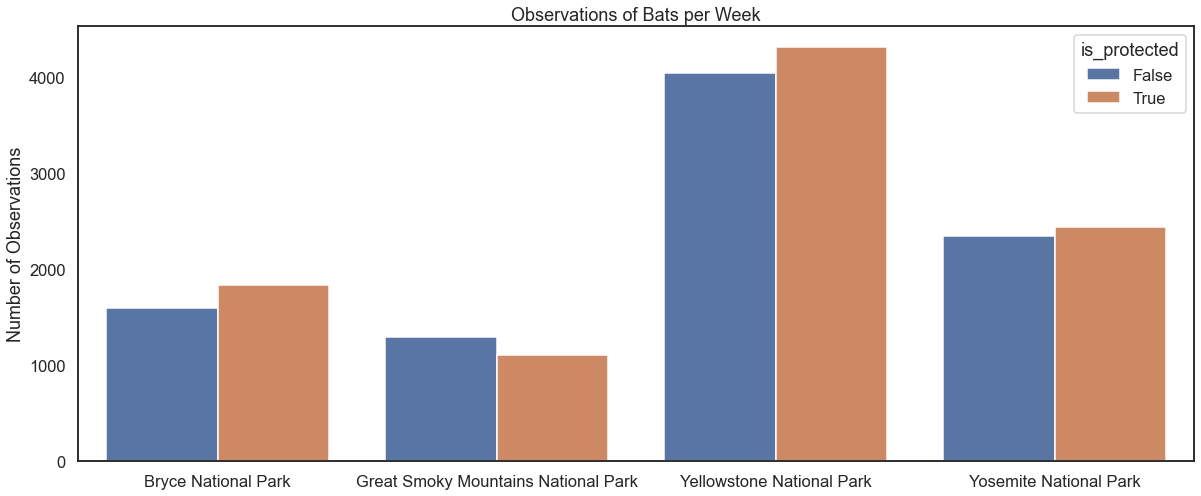

In [65]:
plt.figure(figsize=(20,8))
sns.barplot(x=obs_per_park.park_name, y=obs_per_park.observations, hue=obs_per_park.is_protected)
plt.xlabel('')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
sns.set_context("talk")
plt.show()